<div>
Olá, Bernardo!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Essa versão do seu trabalho ficou muito melhor! Espero que as sugestões sejam relevantes para projetos futuros.
    
<br>
Te desejo uma jornada de muito sucesso e aprendizado.
    
<br>   
    
Qualquer dúvida, pode contar comigo.   
    
<br>  
    
**Até breve!**

</div>

# Projeto - Análise de Negócio

### Passo 1 -  Carregamento dos Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Importação dos Dados
v_logs = pd.read_csv('/datasets/visits_log_us.csv')
o_logs = pd.read_csv('/datasets/orders_log_us.csv')
c_logs = pd.read_csv('/datasets/costs_us.csv')

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O import das bibliotecas foi feito de forma correta e em uma célula separada
- Os dados foram carregados corretamente. **Sugestão:** Considere dar nomes mais significativos para seus dataframes ao invés de usar apenas uma letra. 
</div>

In [3]:
#Informações (v_logs)
print(v_logs.info())
print()
print(v_logs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None

    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   99696

In [4]:
#Colunas com letras Minúsculas e Removendo Espaços
v_logs = v_logs.rename(columns={'Device': 'device', 'Start Ts': 'start_ts', 'End Ts': 'end_ts', 'Source Id': 'source_id', 'Uid': 'uid'})

In [5]:
#Otimizando Dados (v_logs)
v_logs['device'] = v_logs['device'].astype('category')

v_logs['start_ts'] =  pd.to_datetime(v_logs['start_ts'], format="%Y-%m-%d %H:%M:%S")
v_logs['end_ts'] =  pd.to_datetime(v_logs['end_ts'], format="%Y-%m-%d %H:%M:%S")

print(v_logs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB
None


In [6]:
#Informações (o_logs)
print(o_logs.info())
print()
print(o_logs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None

                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450


In [7]:
#Colunas com letras Minúsculas e Removendo Espaços
o_logs = o_logs.rename(columns={'Buy Ts': 'buy_ts', 'Revenue': 'revenue', 'Uid': 'uid'})

In [8]:
#Otimizando Dados (o_logs)
o_logs['buy_ts'] =  pd.to_datetime(o_logs['buy_ts'], format="%Y-%m-%d %H:%M:%S")
print(o_logs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None


In [9]:
#Informações (c_logs)
print(c_logs.info())
print()
print(c_logs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None

   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08


In [10]:
#Otimizando Dados (c_logs)
c_logs['dt'] =  pd.to_datetime(c_logs['dt'], format="%Y-%m-%d %H:%M:%S")
print(c_logs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None


In [11]:
#Verificando de há valores ausentes
print(v_logs.isnull().sum())
print(o_logs.isnull().sum())
print(c_logs.isnull().sum())

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64
buy_ts     0
revenue    0
uid        0
dtype: int64
source_id    0
dt           0
costs        0
dtype: int64


In [12]:
#conversão dos tipos de dados
v_logs['start_ts'] = pd.to_datetime(
    v_logs['start_ts'], format="%Y-%m-%d %H:%M"
)
v_logs['end_ts'] = pd.to_datetime(
    v_logs['end_ts'], format="%Y-%m-%d %H:%M"
)

- Realizamos a importação e a preparação dos dados, sempre buscando otimizar as informações.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O método `head()` foi utilizado para exibir uma amostra inicial dos seus dados
- O método `info()` foi utilizado para estudo inicial do conjunto de dados
- O nome das colunas foi convertido corretamente para seguir a convenção `snake_case`.
- Os valores ausentes foram analisados
- Os tipos de dados foram convertidos corretamente
</div>


### Passo 2 - Faça relatórios e calcule as métricas

#### Produto:

In [13]:
#Quantas pessoas usam-no cada dia, semana e mês?
v_logs['session_year'] = v_logs['start_ts'].dt.year
v_logs['session_month'] = v_logs['start_ts'].dt.month
v_logs['session_week'] = v_logs['start_ts'].dt.week
v_logs['session_date'] = v_logs['start_ts'].dt.date

mau_total = (
    v_logs.groupby(['session_year', 'session_month'])
    .agg({'uid': 'nunique'})
    .mean()
)
dau_total = (
    v_logs.groupby('session_date')
    .agg({'uid': 'nunique'})
    .mean()
)
wau_total = (
    v_logs.groupby(['session_year', 'session_week'])
    .agg({'uid': 'nunique'})
    .mean()
)

daily_users = dau_total
week_users = dau_total / wau_total * 100
month_users = dau_total / mau_total * 100

print(daily_users)
print()
print(week_users)
print()
print(month_users)

uid    907.991758
dtype: float64

uid    15.884409
dtype: float64

uid    3.90897
dtype: float64


In [14]:
#Calcular o número de usuários únicos por dia, semana e mês
daily_users = v_logs.groupby(v_logs['start_ts'].dt.date)['uid'].nunique()
weekly_users = v_logs.groupby(v_logs['start_ts'].dt.to_period('W'))['uid'].nunique()
monthly_users = v_logs.groupby(v_logs['start_ts'].dt.to_period('M'))['uid'].nunique()

print("Usuários únicos por dia:")
print(daily_users.head())
print("\nUsuários únicos por semana:")
print(weekly_users.head())
print("\nUsuários únicos por mês:")
print(monthly_users.head())

Usuários únicos por dia:
start_ts
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
Name: uid, dtype: int64

Usuários únicos por semana:
start_ts
2017-05-29/2017-06-04    2021
2017-06-05/2017-06-11    4129
2017-06-12/2017-06-18    2812
2017-06-19/2017-06-25    2878
2017-06-26/2017-07-02    3064
Freq: W-SUN, Name: uid, dtype: int64

Usuários únicos por mês:
start_ts
2017-06    13259
2017-07    14183
2017-08    11631
2017-09    18975
2017-10    29692
Freq: M, Name: uid, dtype: int64


In [15]:
#Sessões por dia
daily_sessions = v_logs.groupby(v_logs['start_ts'].dt.date)['uid'].count()
print(daily_sessions.head())

start_ts
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
Name: uid, dtype: int64


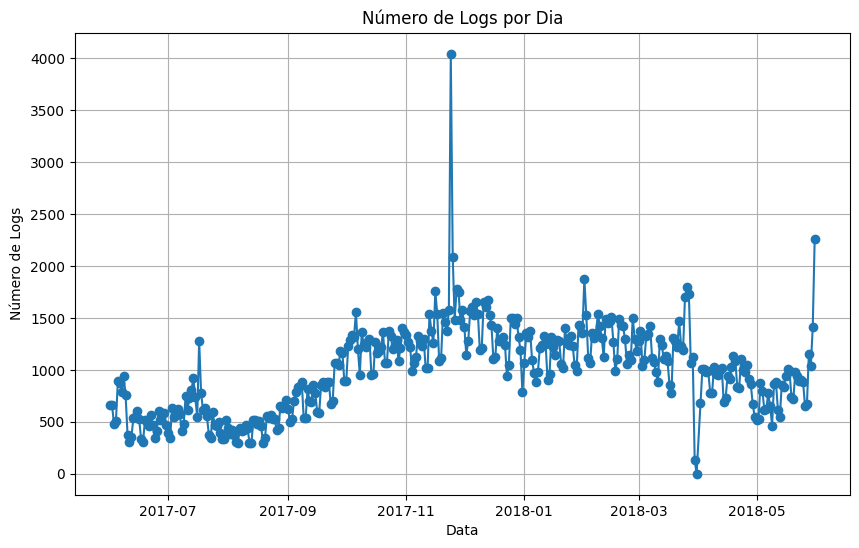

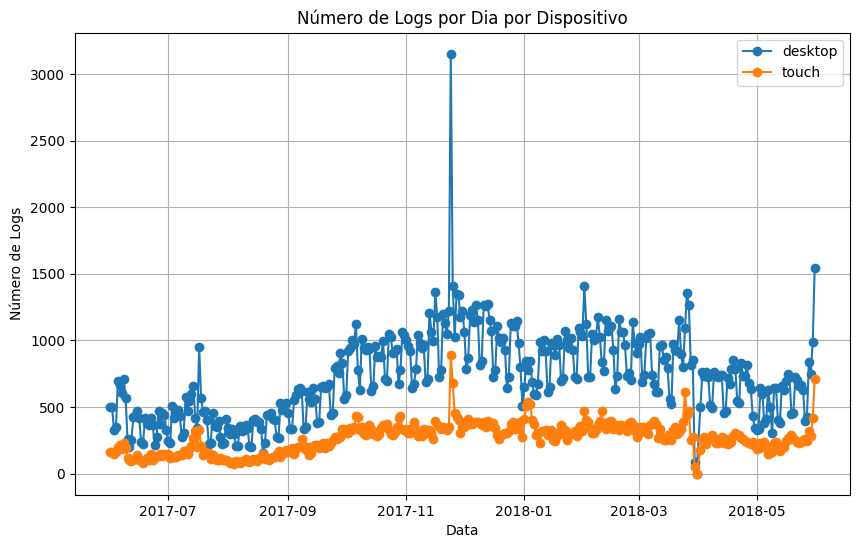

In [16]:
#Criando Gráficos
#Numero de Logs por dia
plt.figure(figsize=(10, 6))
plt.plot(daily_sessions.index, daily_sessions.values, marker='o')
plt.title('Número de Logs por Dia')
plt.xlabel('Data')
plt.ylabel('Número de Logs')
plt.grid(True)
plt.show()

#Numero de Logs por dia por dispositivo
#Agrupando dispositivos
logs_by_device = v_logs.groupby([v_logs['start_ts'].dt.date, 'device'])['uid'].count().unstack()

plt.figure(figsize=(10, 6))
for device in logs_by_device.columns:
    plt.plot(logs_by_device.index, logs_by_device[device], marker='o', label=device)
plt.title('Número de Logs por Dia por Dispositivo')
plt.xlabel('Data')
plt.ylabel('Número de Logs')
plt.legend()
plt.grid(True)
plt.show()

643.506488592098
10.725108143201632


<AxesSubplot:>

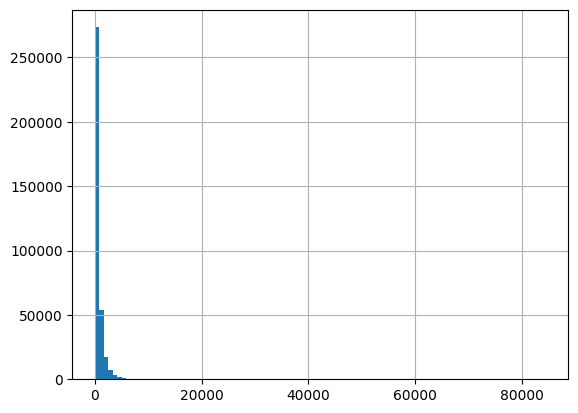

In [17]:
#Calculando o comprimento de cada sessão
v_logs['sess_duration_sec'] = (v_logs['end_ts'] - v_logs['start_ts']).dt.seconds
print(v_logs['sess_duration_sec'].mean())

v_logs['sess_duration_min'] = v_logs['sess_duration_sec'] / 60
print(v_logs['sess_duration_min'].mean())

v_logs['sess_duration_sec'].hist(bins=100)

Conclusão:
- Se o número de sessões aumenta significativamente em determinados períodos, isso pode indicar que as campanhas de marketing ou eventos estão efetivamente trazendo usuários de volta ao site ou aplicativo.

In [18]:
#Calculando retenção
v_logs['date'] = v_logs['start_ts'].dt.date
user_presence = v_logs.groupby(['uid', 'date']).size().reset_index(name='visits')
user_presence['next_date'] = user_presence['date'] + pd.Timedelta(days=1)
user_presence['date'] = pd.to_datetime(user_presence['date'])
user_presence['next_date'] = pd.to_datetime(user_presence['next_date'])

#Encontrar retornos no próximo dia
next_day_return = pd.merge(user_presence, user_presence, left_on=['uid', 'next_date'], right_on=['uid', 'date'], suffixes=('', '_next'))

#Retenção diária
daily_retention = next_day_return.groupby('date').size() / user_presence.groupby('date').size()

print(daily_retention.head())

date
2017-06-01    0.072727
2017-06-02    0.034539
2017-06-03    0.047191
2017-06-04    0.060924
2017-06-05    0.080488
dtype: float64


In [19]:
#Calculando retenção Semanal
user_presence['next_week'] = user_presence['date'] + pd.Timedelta(weeks=1)
user_presence['next_week'] = pd.to_datetime(user_presence['next_week'])

# Mesclar o DataFrame consigo mesmo para encontrar retornos na próxima semana
next_week_return = pd.merge(user_presence, user_presence, left_on=['uid', 'next_week'], right_on=['uid', 'date'], suffixes=('', '_next'))

#Retenção semanal
weekly_retention = next_week_return.groupby('date').size() / user_presence.groupby('date').size()
print(weekly_retention.head())

date
2017-06-01    0.041322
2017-06-02    0.037829
2017-06-03    0.024719
2017-06-04    0.014706
2017-06-05    0.010976
dtype: float64


In [20]:
#Calculando retenção mensal
user_presence['next_month'] = user_presence['date'] + pd.DateOffset(months=1)
user_presence['next_month'] = pd.to_datetime(user_presence['next_month'])

# Mesclar o DataFrame consigo mesmo para encontrar retornos no próximo mês
next_month_return = pd.merge(user_presence, user_presence, left_on=['uid', 'next_month'], right_on=['uid', 'date'], suffixes=('', '_next'))

#Retenção mensal
monthly_retention = next_month_return.groupby('date').size() / user_presence.groupby('date').size()
print(monthly_retention.head())

date
2017-06-01    0.009917
2017-06-02    0.009868
2017-06-03    0.008989
2017-06-04    0.014706
2017-06-05    0.018293
dtype: float64


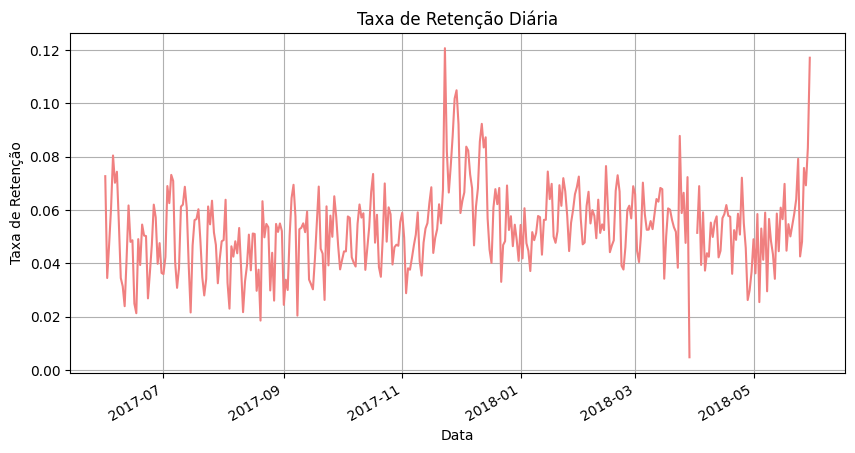

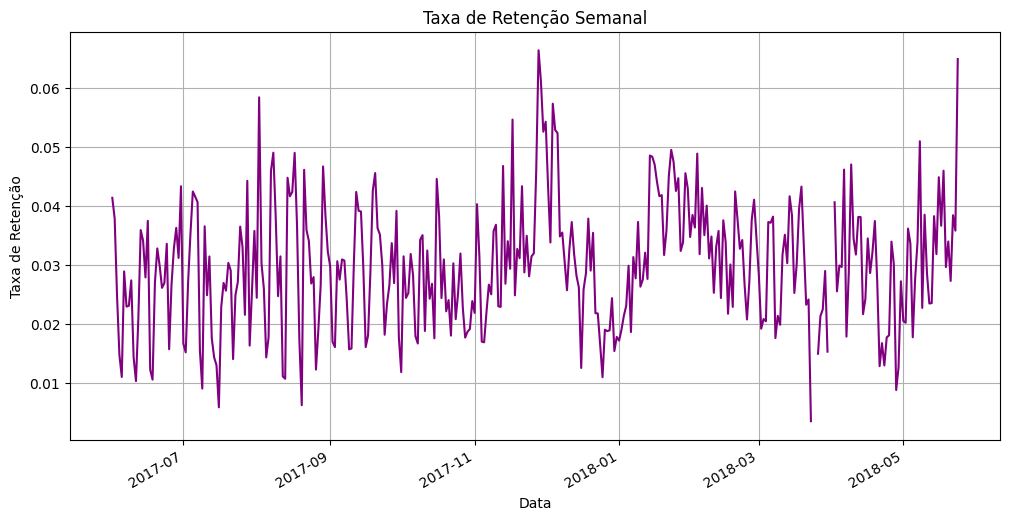

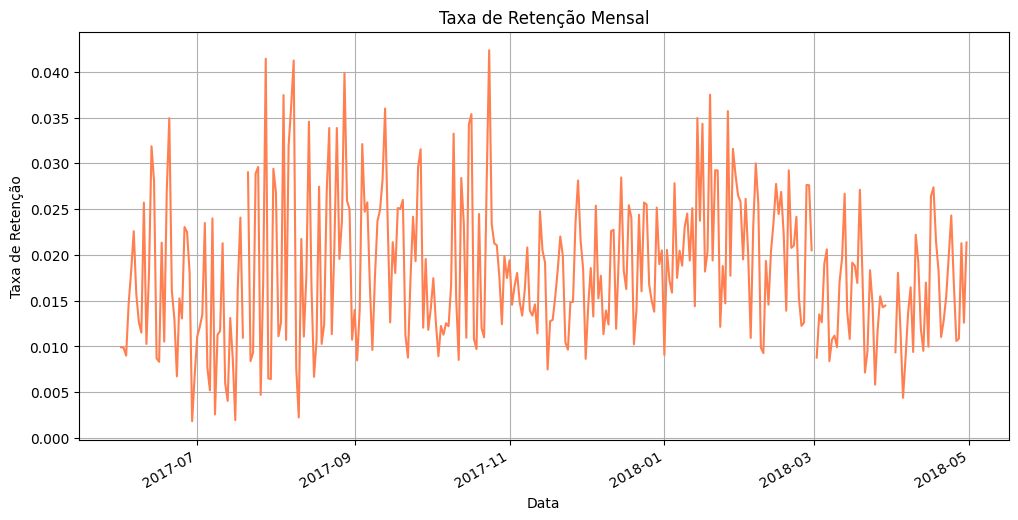

In [21]:
# Visualizar a taxa de retenção diária
plt.figure(figsize=(10, 5))
daily_retention.plot(color='lightcoral')
plt.title('Taxa de Retenção Diária')
plt.xlabel('Data')
plt.ylabel('Taxa de Retenção')
plt.grid(True)
plt.show()

# Visualizar a taxa de retenção semanal
plt.figure(figsize=(12, 6))
weekly_retention.plot(color='purple')
plt.title('Taxa de Retenção Semanal')
plt.xlabel('Data')
plt.ylabel('Taxa de Retenção')
plt.grid(True)
plt.show()

# Visualizar a taxa de retenção mensal
plt.figure(figsize=(12, 6))
monthly_retention.plot(color='coral')
plt.title('Taxa de Retenção Mensal')
plt.xlabel('Data')
plt.ylabel('Taxa de Retenção')
plt.grid(True)
plt.show()

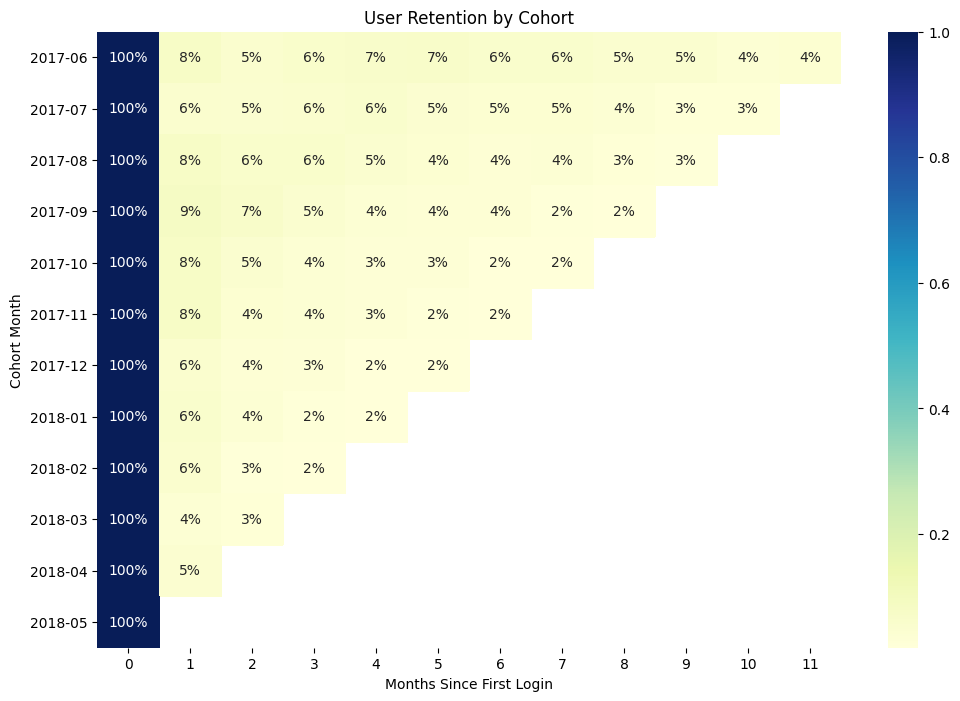

In [22]:
#Com que frêquencia os usuarios voltam?
#Primeiro acesso de cada usuário
#Convertendo as datas para mês e ano
v_logs['log_month'] = v_logs['start_ts'].dt.to_period('M')
first_log = v_logs.groupby('uid')['log_month'].min().reset_index()
first_log.columns = ['uid', 'first_log_month']

#Merge
v_logs = v_logs.merge(first_log, on='uid')
v_logs['cohort_age'] = (v_logs['log_month'] - v_logs['first_log_month']).apply(lambda x: x.n)

#Tabela dinâmica 
cohort_counts = v_logs.pivot_table(index='first_log_month',
                                   columns='cohort_age',
                                   values='uid',
                                   aggfunc='nunique')
#Taxa de retenção
cohort_sizes = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

#Gráfico de calor
plt.figure(figsize=(12, 8))
sns.heatmap(retention, annot=True, fmt='.0%', cmap="YlGnBu")
plt.title('User Retention by Cohort')
plt.xlabel('Months Since First Login')
plt.ylabel('Cohort Month')
plt.show()

Conclusões:

Retenção Diária: Indica a porcentagem de usuários que retornam no dia seguinte após o uso de um serviço.

- Valores de Retenção Diária: Em média, o valor de retenção diária é de 6%.
A retenção diária é muito baixa, indicando que a maioria dos usuários não retorna no dia seguinte. Isso sugere que os usuários não estão altamente engajados no dia a dia ou que o serviço não oferece motivos suficientes para retornarem diariamente.
Retenção Semanal: Indica a porcentagem de usuários que retornam na mesma semana.

- Valores de Retenção Semanal: Em média, o valor de retenção semanal é de 2,6%.
A retenção semanal não é alta, indicando que os usuários não encontram motivos suficientes para usar o serviço semanalmente. Isso pode sugerir que o conteúdo ou os serviços oferecidos não são suficientemente atraentes ou necessários para um uso semanal.
Retenção Mensal: Indica a porcentagem de usuários que retornam no mesmo mês.

- Valores de Retenção Mensal: Em média, o valor de retenção mensal é de 1,2%.
A retenção mensal é bastante baixa, sugerindo que, a longo prazo, muito poucos usuários continuam a usar o serviço regularmente. Isso pode ser preocupante, pois a retenção de longo prazo é crítica para o sucesso sustentável de um serviço.
Conclusão Geral: Baixo engajamento, necessidade de melhorias e recomendação de monitoração contínua.

#### Vendas:

In [23]:
#Quando as pessoas começam a comprar?
#Primeira sessão de cada usuário
first_session = v_logs.groupby('uid').agg({'start_ts': 'min'}).reset_index()

#Primeira compra de cada usuário
first_purchase = o_logs.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
user_data = pd.merge(first_session, first_purchase, on='uid', how='left')

#Calcular o tempo de conversão em dias
user_data['conversion_time'] = (user_data['buy_ts'] - user_data['start_ts']).dt.days

#Conversão
user_data['conversion_category'] = np.where(
    user_data['conversion_time'].notnull(),
    'Conversão ' + user_data['conversion_time'].astype(str) + 'd',
    'No Conversion'
)
# Contar número de conversões por categoria
conversion_counts = user_data['conversion_category'].value_counts().sort_index()
print(conversion_counts)

Conversão 0.0d       26363
Conversão 1.0d        1011
Conversão 10.0d        140
Conversão 100.0d        31
Conversão 101.0d        23
                     ...  
Conversão 96.0d         26
Conversão 97.0d         32
Conversão 98.0d         32
Conversão 99.0d         27
No Conversion       191646
Name: conversion_category, Length: 346, dtype: int64


In [24]:
# Análise por coortes
user_data['cohort'] = user_data['start_ts'].dt.to_period('M')

# Comparar conversões entre diferentes coortes
cohort_analysis = user_data.groupby(['cohort', 'conversion_category']).size().unstack().fillna(0)
print(cohort_analysis)

conversion_category  Conversão 0.0d  Conversão 1.0d  Conversão 10.0d  \
cohort                                                                 
2017-06                      1804.0            55.0              6.0   
2017-07                      1526.0            59.0              7.0   
2017-08                      1097.0            27.0              3.0   
2017-09                      1966.0            71.0             13.0   
2017-10                      3302.0           118.0             16.0   
2017-11                      2866.0           145.0             25.0   
2017-12                      2992.0           125.0             13.0   
2018-01                      2326.0            94.0             15.0   
2018-02                      2482.0            95.0             13.0   
2018-03                      2369.0            81.0              9.0   
2018-04                      1557.0            61.0             10.0   
2018-05                      2076.0            80.0             

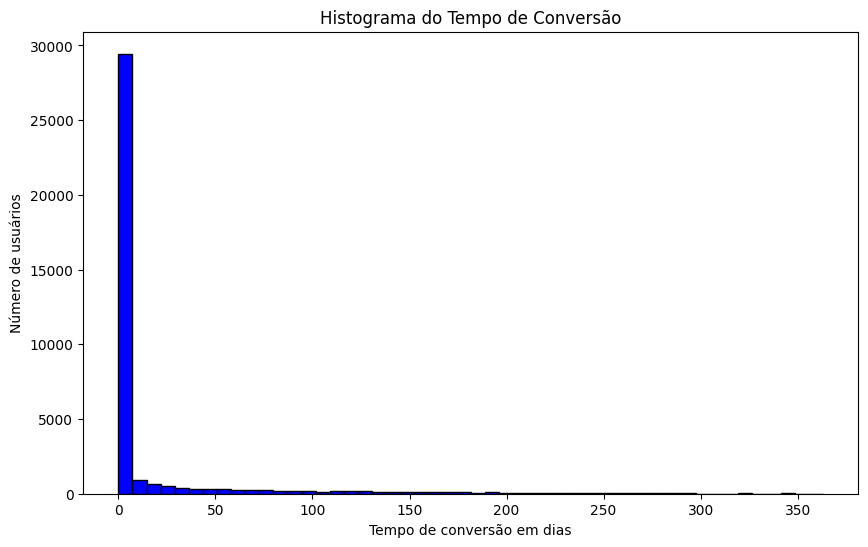

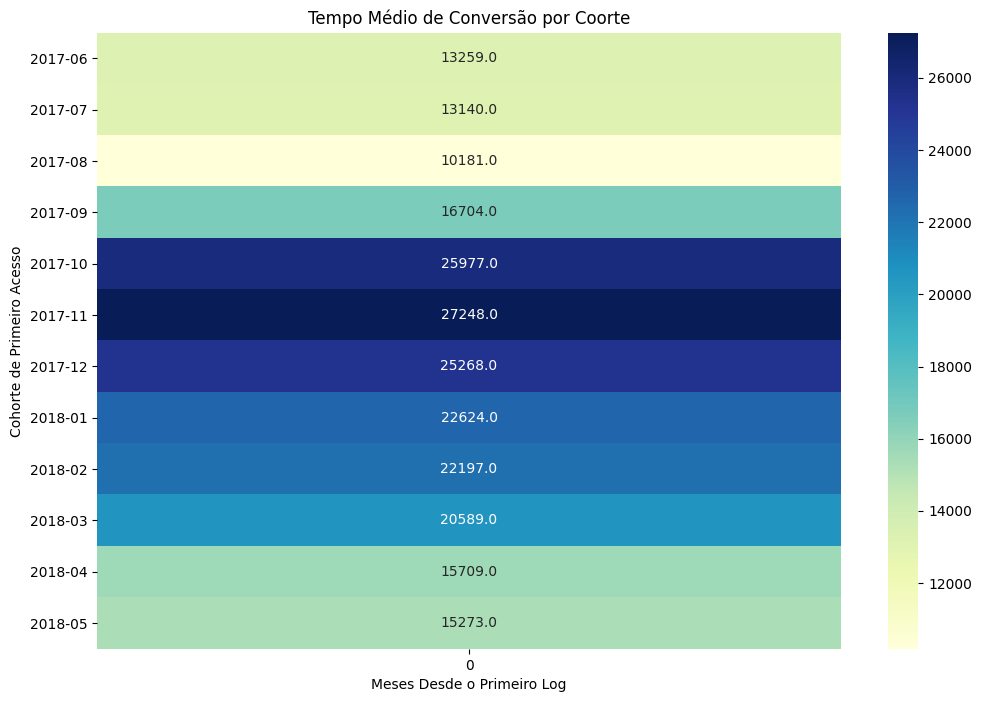

In [25]:
#Primeiro log de cada usuário
first_log = v_logs.groupby('uid')['start_ts'].min()
user_data = user_data.merge(first_log.rename('first_log'), on='uid', how='left')

#Periodo mensal
user_data['first_log_month'] = user_data['first_log'].dt.to_period('M')
user_data['conversion_month'] = user_data['first_log_month']

#Tempo de conversão
user_data['conversion_time'] = (user_data['buy_ts'] - user_data['first_log']).dt.days

# Plotar a distribuição do tempo de conversão
plt.figure(figsize=(10, 6))
plt.hist(user_data['conversion_time'].dropna(), bins=50, color='blue', edgecolor='black')
plt.title('Histograma do Tempo de Conversão')
plt.xlabel('Tempo de conversão em dias')
plt.ylabel('Número de usuários')
plt.show()

#Tempo de coorte
user_data['cohort_age'] = (user_data['conversion_month'].astype(int) - user_data['first_log_month'].astype(int))

#Tabela de coorte
cohort_conversion = user_data.pivot_table(index='first_log_month', columns='cohort_age', values='uid', aggfunc='count')

#Mapa de Calor
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_conversion, annot=True, fmt='.1f', cmap="YlGnBu")
plt.title('Tempo Médio de Conversão por Coorte')
plt.xlabel('Meses Desde o Primeiro Log')
plt.ylabel('Cohorte de Primeiro Acesso')
plt.show()

Conclusão:
- Podemos identificar quais coortes (mês/ano de registro) têm as melhores taxas de conversão e investigar o que pode ter influenciado esses resultados (por exemplo, campanhas de marketing específicas).

In [26]:
#Quantos pedidos os clientes fazem durante um determinado período de tempo?
# Verificar se as colunas de timestamp estão no formato datetime
o_logs['buy_ts'] = pd.to_datetime(o_logs['buy_ts'])

#Cliente por dia
daily_orders = o_logs.groupby([o_logs['buy_ts'].dt.date, 'uid']).size().reset_index(name='order_count')
daily_orders_summary = daily_orders.groupby('buy_ts')['order_count'].sum().reset_index(name='total_orders')

#Cliente por semana
weekly_orders = o_logs.groupby([o_logs['buy_ts'].dt.to_period('W'), 'uid']).size().reset_index(name='order_count')
weekly_orders_summary = weekly_orders.groupby('buy_ts')['order_count'].sum().reset_index(name='total_orders')

#Cliente por mês
monthly_orders = o_logs.groupby([o_logs['buy_ts'].dt.to_period('M'), 'uid']).size().reset_index(name='order_count')
monthly_orders_summary = monthly_orders.groupby('buy_ts')['order_count'].sum().reset_index(name='total_orders')

print("Pedidos diários:")
print(daily_orders_summary.head())

print("\nPedidos semanais:")
print(weekly_orders_summary.head())

print("\nPedidos mensais:")
print(monthly_orders_summary.head())

Pedidos diários:
       buy_ts  total_orders
0  2017-06-01            96
1  2017-06-02           111
2  2017-06-03            67
3  2017-06-04            66
4  2017-06-05           161

Pedidos semanais:
                  buy_ts  total_orders
0  2017-05-29/2017-06-04           340
1  2017-06-05/2017-06-11           938
2  2017-06-12/2017-06-18           343
3  2017-06-19/2017-06-25           371
4  2017-06-26/2017-07-02           460

Pedidos mensais:
    buy_ts  total_orders
0  2017-06          2354
1  2017-07          2363
2  2017-08          1807
3  2017-09          3387
4  2017-10          5679


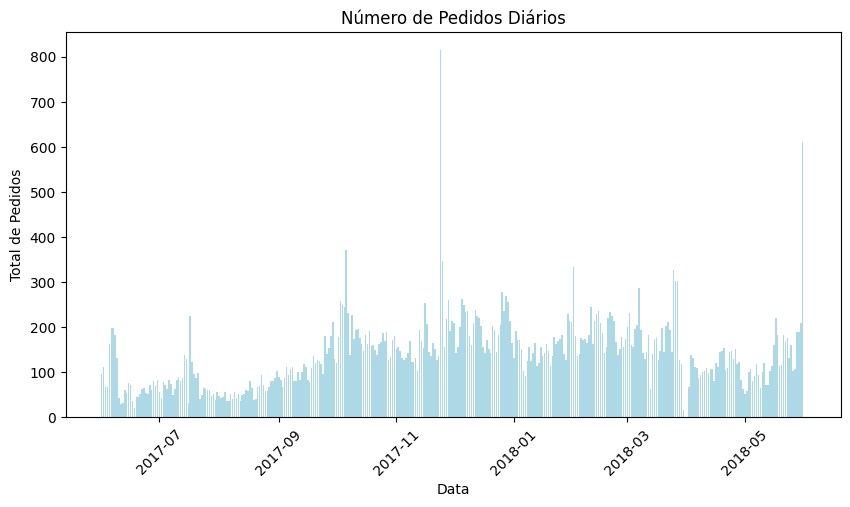

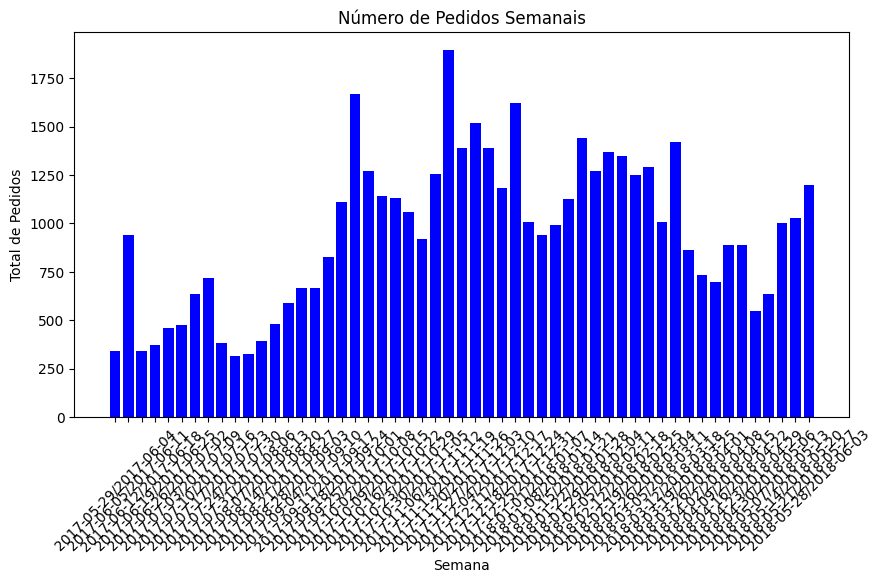

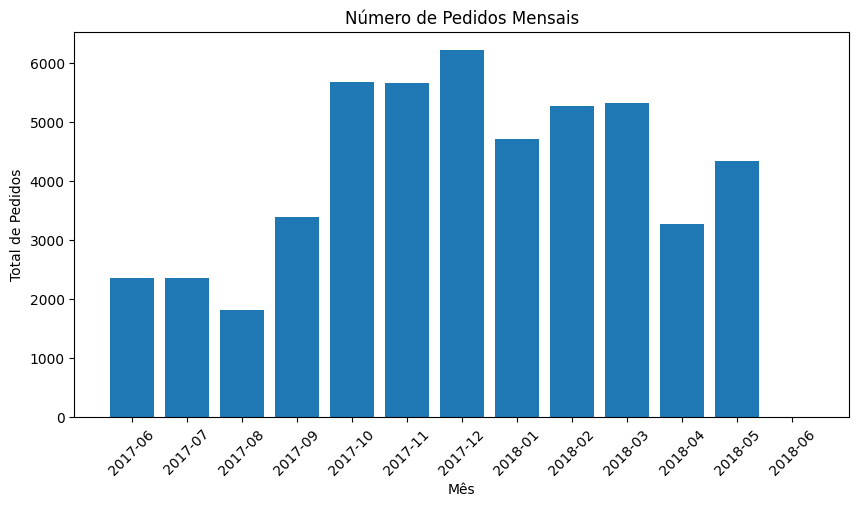

In [27]:
#Visualização por meio de gráfico de barras
#Pedidos diários
plt.figure(figsize=(10, 5))
plt.bar(daily_orders_summary['buy_ts'], daily_orders_summary['total_orders'], color='lightblue')
plt.title('Número de Pedidos Diários')
plt.xlabel('Data')
plt.ylabel('Total de Pedidos')
plt.xticks(rotation=45)
plt.show()

#Pedidos semanais
plt.figure(figsize=(10, 5))
plt.bar(weekly_orders_summary['buy_ts'].astype(str), weekly_orders_summary['total_orders'], color='blue')
plt.title('Número de Pedidos Semanais')
plt.xlabel('Semana')
plt.ylabel('Total de Pedidos')
plt.xticks(rotation=45)
plt.show()

#Pedidos mensais
plt.figure(figsize=(10, 5))
plt.bar(monthly_orders_summary['buy_ts'].astype(str), monthly_orders_summary['total_orders'])
plt.title('Número de Pedidos Mensais')
plt.xlabel('Mês')
plt.ylabel('Total de Pedidos')
plt.xticks(rotation=45)
plt.show()

Tendências de Pedidos ao Longo do Tempo:

- Mensal: O número de pedidos mensais cresce, especialmente de agosto a outubro, possivelmente devido ao aumento na base de clientes, campanhas de marketing bem-sucedidas ou sazonalidade, como promoções de fim de ano.
- Semanal: A variação semanal mostra uma tendência crescente com picos específicos, sugerindo a necessidade de investigar causas como promoções semanais ou lançamentos de produtos.
- Diário: O número diário de pedidos varia bastante, com alguns dias significativamente mais altos, possivelmente devido a promoções diárias, comportamentos de compra específicos em dias da semana ou outros fatores.

Essas conclusões podem ajudar a empresa a entender melhor o comportamento de compra dos seus clientes e a otimizar suas estratégias de marketing e operações para maximizar as vendas.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
O volume de compras por período foi analisado. Como sugestão, aqui você poderia usar somente a data no eixo-x dos gráficos acima para evitar que a figura fique muito carregada.
</div>

In [28]:
#Volume médio de uma compra
average_order_value = o_logs['revenue'].mean()
print(f'O volume médio de uma compra é: {average_order_value:.2f}')

O volume médio de uma compra é: 5.00


Conclusão: O volume médio de uma compra refere-se ao valor médio que os clientes gastam em cada pedido. O valor médio de uma compra é de 5,00.

In [29]:
#1
#Calcule o primeiro pedido de cada usuario e extraia o mês
first_orders_df = v_logs.groupby('uid').agg({'start_ts': 'min'}).reset_index().rename(columns={'start_ts': 'first_purchase'})
first_orders_df['first_purchase_month'] = first_orders_df['first_purchase'].dt.to_period('M')
print(first_orders_df.head())

               uid      first_purchase first_purchase_month
0   11863502262781 2018-03-01 17:27:00              2018-03
1   49537067089222 2018-02-06 15:55:00              2018-02
2  297729379853735 2017-06-07 18:47:00              2017-06
3  313578113262317 2017-09-18 22:49:00              2017-09
4  325320750514679 2017-09-30 14:29:00              2017-09


In [30]:
#2
#Faça o merge entre o primeiro pedido e os dados de source pelo ID.
user_source = v_logs[['uid', 'source_id']].drop_duplicates()
first_orders_df = pd.merge(first_orders_df, user_source, on='uid')
print(first_orders_df.head())

               uid      first_purchase first_purchase_month  source_id
0   11863502262781 2018-03-01 17:27:00              2018-03          3
1   49537067089222 2018-02-06 15:55:00              2018-02          2
2  297729379853735 2017-06-07 18:47:00              2017-06          3
3  313578113262317 2017-09-18 22:49:00              2017-09          2
4  325320750514679 2017-09-30 14:29:00              2017-09          5


In [31]:
#3
#Calcule a receita mensal e faça o merge com a tabela criada anteriormente.
o_logs['purchase_month'] = o_logs['buy_ts'].dt.to_period("M")

#Receita mensal por usuário
revenue_df = o_logs.groupby(['uid', 'purchase_month']).agg({'revenue': 'sum'}).reset_index()

#Merge
buyers = first_orders_df.merge(revenue_df, on='uid')
print(buyers.head())

                uid      first_purchase first_purchase_month  source_id  \
0   313578113262317 2017-09-18 22:49:00              2017-09          2   
1  1575281904278712 2017-06-03 10:13:00              2017-06         10   
2  2429014661409475 2017-10-11 17:14:00              2017-10          3   
3  2464366381792757 2018-01-27 20:10:00              2018-01          5   
4  2551852515556206 2017-11-24 10:14:00              2017-11          5   

  purchase_month  revenue  
0        2018-01     0.55  
1        2017-06     3.05  
2        2017-10    73.33  
3        2018-01     2.44  
4        2017-11    10.99  


In [32]:
#4
#Calcule a receita e os custos.
#Receita
revenue_grouped_df = buyers.groupby(['source_id', 'purchase_month']).agg({'revenue': 'sum'}).reset_index()

#Calcular custos
costs_grouped_df = c_logs.groupby(['source_id', c_logs['dt'].dt.to_period('M')]).agg({'costs': 'sum'}).reset_index()
costs_grouped_df = costs_grouped_df.rename(columns={'dt': 'purchase_month'})

#Merge
revenue_costs_df = pd.merge(revenue_grouped_df, costs_grouped_df, on=['source_id', 'purchase_month'], how='left')
print(revenue_costs_df.head())

   source_id purchase_month   revenue    costs
0          1        2017-06   2563.84  1125.61
1          1        2017-07   3947.25  1072.88
2          1        2017-08   3325.64   951.81
3          1        2017-09   8193.42  1502.01
4          1        2017-10  11466.14  2315.75


In [33]:
#5
#Por fim, gere um dataframe por source e month com os dados de receita e custo.
#Merge
report = pd.merge(
    costs_grouped_df, 
    revenue_grouped_df, 
    left_on=['source_id', 'purchase_month'], 
    right_on=['source_id', 'purchase_month'],
    how='left'
)

print(report.head())

   source_id purchase_month    costs   revenue
0          1        2017-06  1125.61   2563.84
1          1        2017-07  1072.88   3947.25
2          1        2017-08   951.81   3325.64
3          1        2017-09  1502.01   8193.42
4          1        2017-10  2315.75  11466.14


In [34]:
first_orders_df = o_logs.groupby("uid").agg({"buy_ts": "min"}).reset_index().rename(columns={"buy_ts": "first_purchase"})
first_orders_df['first_purchase_month'] = first_orders_df['first_purchase'].dt.to_period("M")

user_source = v_logs[['uid', 'source_id']].drop_duplicates()
first_orders_df = pd.merge(first_orders_df, user_source, on='uid')

o_logs['month'] = o_logs['buy_ts'].dt.to_period('M')
revenue_df = o_logs.groupby(['uid', 'month']).agg({'revenue': 'sum'}).reset_index()

buyers = first_orders_df.merge(revenue_df, on='uid')

revenue_grouped_df = buyers.groupby(['source_id', 'month']).agg({'revenue': 'sum'}).reset_index()

c_logs['month'] = c_logs['dt'].dt.to_period('M')
costs_grouped_df = c_logs.groupby(['source_id', 'month']).agg({'costs': 'sum'}).reset_index()

report = pd.merge(
    costs_grouped_df, 
    revenue_grouped_df, 
    left_on=['source_id', 'month'], 
    right_on=['source_id', 'month']
)

print(report)

    source_id    month    costs   revenue
0           1  2017-06  1125.61   2563.84
1           1  2017-07  1072.88   3947.25
2           1  2017-08   951.81   3325.64
3           1  2017-09  1502.01   8193.42
4           1  2017-10  2315.75  11466.14
..        ...      ...      ...       ...
79         10  2018-01   614.35    466.84
80         10  2018-02   480.88    671.89
81         10  2018-03   526.41   1159.97
82         10  2018-04   388.25    674.07
83         10  2018-05   409.86    963.90

[84 rows x 4 columns]


In [35]:
report

,source_id,month,costs,revenue
0,1,2017-06,1125.61,2563.84
1,1,2017-07,1072.88,3947.25
2,1,2017-08,951.81,3325.64
3,1,2017-09,1502.01,8193.42
4,1,2017-10,2315.75,11466.14
...,...,...,...,...
79,10,2018-01,614.35,466.84
80,10,2018-02,480.88,671.89
81,10,2018-03,526.41,1159.97
82,10,2018-04,388.25,674.07


In [36]:
report['ltv'] = report['revenue'] / buyers.groupby('source_id')['uid'].transform('count').mean()
print(report['ltv'])

0     0.200187
1     0.308205
2     0.259669
3     0.639751
4     0.895288
        ...   
79    0.036451
80    0.052462
81    0.090572
82    0.052632
83    0.075262
Name: ltv, Length: 84, dtype: float64


In [37]:
report.groupby('source_id')['revenue'].transform('count')

0     12
1     12
2     12
3     12
4     12
      ..
79    12
80    12
81    12
82    12
83    12
Name: revenue, Length: 84, dtype: int64

In [38]:
buyers_count = buyers.groupby(['source_id', 'month'])['uid'].nunique().reset_index()
buyers_count.rename(columns={'uid': 'n_buyers'}, inplace=True)

report = pd.merge(report, buyers_count, on=['source_id', 'month'], how='left')
report['ltv'] = report['revenue'] / report['n_buyers']

print(report[['source_id', 'month', 'revenue', 'n_buyers', 'ltv']])

    source_id    month   revenue  n_buyers        ltv
0           1  2017-06   2563.84       401   6.393616
1           1  2017-07   3947.25       437   9.032609
2           1  2017-08   3325.64       338   9.839172
3           1  2017-09   8193.42       617  13.279449
4           1  2017-10  11466.14       977  11.736070
..        ...      ...       ...       ...        ...
79         10  2018-01    466.84       144   3.241944
80         10  2018-02    671.89       207   3.245845
81         10  2018-03   1159.97       283   4.098834
82         10  2018-04    674.07       171   3.941930
83         10  2018-05    963.90       203   4.748276

[84 rows x 5 columns]


month_diff           0     1     2      3      4      5      6      7      8   \
first_order_month                                                               
2017-06            4.72  5.21  5.65   6.60   7.62   8.36   9.31   9.89  10.45   
2017-07            6.01  6.35  6.97   7.33   7.50   7.66   7.78   7.92   8.08   
2017-08            5.28  5.75  6.21   6.60   7.09   7.38   7.59   7.99   8.28   
2017-09            5.64  6.76  7.28  11.26  11.66  12.31  13.01  13.25  13.44   
2017-10            5.00  5.54  5.73   5.89   6.04   6.16   6.24   6.36    NaN   
2017-11            5.15  5.55  5.75   6.08   6.23   6.28   6.40    NaN    NaN   
2017-12            4.74  5.00  5.92   6.99   7.30   7.64    NaN    NaN    NaN   
2018-01            4.14  4.43  4.73   4.88   4.94    NaN    NaN    NaN    NaN   
2018-02            4.16  4.44  4.51   4.59    NaN    NaN    NaN    NaN    NaN   
2018-03            4.84  5.14  5.46    NaN    NaN    NaN    NaN    NaN    NaN   
2018-04            4.66  5.1

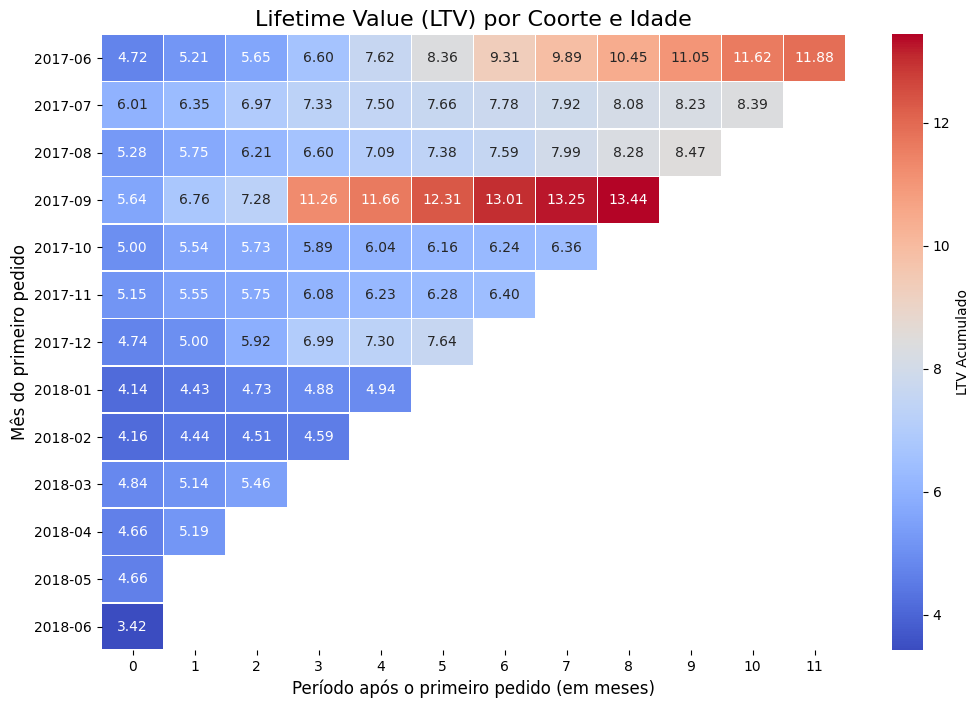

In [57]:
# Criando a coluna 'order_month' a partir da coluna 'buy_ts' que contém a data de compra
o_logs['order_month'] = o_logs['buy_ts'].dt.to_period('M')

#Primeira Compra
first_order_month = o_logs.groupby("uid")['order_month'].min().reset_index().rename(columns={'order_month': 'first_order_month'})

# Mesclando o DataFrame original com o DataFrame que contém a data da primeira compra de cada usuário
cohort = pd.merge(o_logs, first_order_month, on='uid')

# Calculando a diferença em meses entre a compra atual e a primeira compra
cohort['month_diff'] = (cohort['order_month'].astype('int64') - cohort['first_order_month'].astype('int64'))

# Calculando o número de compradores por coorte
cohort_sizes = cohort.groupby('first_order_month')['uid'].nunique().reset_index()
cohort_sizes.rename(columns={'uid': 'n_buyers'}, inplace=True)

# Mesclando o DataFrame de cohort sizes com o DataFrame original
cohort = pd.merge(cohort, cohort_sizes, left_on='first_order_month', right_on='first_order_month')

# Calculando o LTV para cada coorte e período de tempo (em meses) após a primeira compra
cohort['ltv'] = cohort['revenue'] / cohort['n_buyers']

# Criando a Tabela Dinâmica
output = cohort.pivot_table(
    index='first_order_month',
    columns='month_diff',
    values='ltv',
    aggfunc='sum'
)

# Calculando o LTV acumulado ao longo do tempo para cada coorte
ltv_cumsum = output.cumsum(axis=1).round(2)

# Substituindo strings vazias por NaN
ltv_cumsum.replace('', np.nan, inplace=True)

print(ltv_cumsum)

# Gerando o Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ltv_cumsum, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5, cbar_kws={'label': 'LTV Acumulado'})
plt.title('Lifetime Value (LTV) por Coorte e Idade', fontsize=16)
plt.xlabel('Período após o primeiro pedido (em meses)', fontsize=12)
plt.ylabel('Mês do primeiro pedido', fontsize=12)
plt.show()

- Os dados de LTV indicam variações significativas no valor gerado pelos clientes ao longo do tempo. Para otimizar suas estratégias, a empresa deve identificar os motivos dessas variações e ajustar suas campanhas de marketing e retenção para atrair clientes de maior valor, aumentando o retorno sobre o investimento e fortalecendo a sustentabilidade financeira a longo prazo.

#### Marketing:

In [40]:
#Dinheiro total gasto
total_gasto = c_logs['costs'].sum()
print(f'Dinheiro total gasto: {total_gasto:.2f}')

Dinheiro total gasto: 329131.62


In [41]:
#Gasto por origem
gasto_origem = c_logs.groupby('source_id')['costs'].sum().reset_index()
print('Gasto por origem:')
print(gasto_origem)

Gasto por origem:
   source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49


In [42]:
#Gasto ao longo do tempo (agregado mês)
gasto_per_time = c_logs.set_index('dt').resample('M')['costs'].sum().reset_index()
print('Gasto ao longo do tempo:')
print(gasto_per_time)

Gasto ao longo do tempo:
           dt     costs
0  2017-06-30  18015.00
1  2017-07-31  18240.59
2  2017-08-31  14790.54
3  2017-09-30  24368.91
4  2017-10-31  36322.88
5  2017-11-30  37907.88
6  2017-12-31  38315.35
7  2018-01-31  33518.52
8  2018-02-28  32723.03
9  2018-03-31  30415.27
10 2018-04-30  22289.38
11 2018-05-31  22224.27


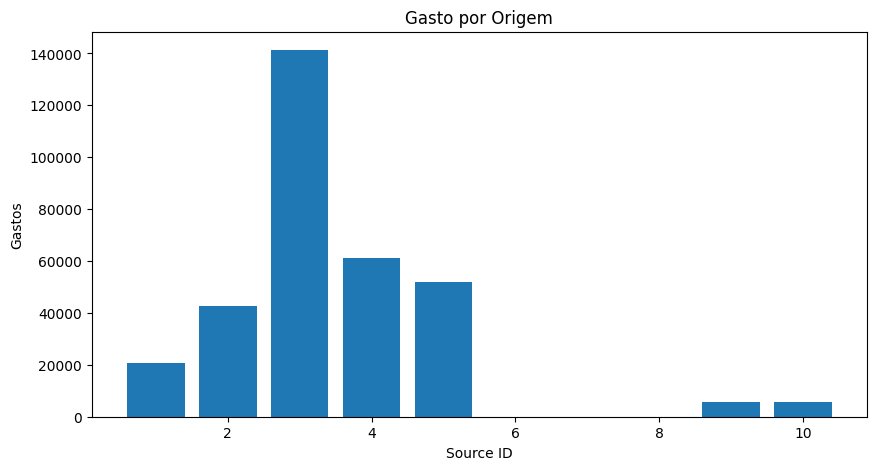

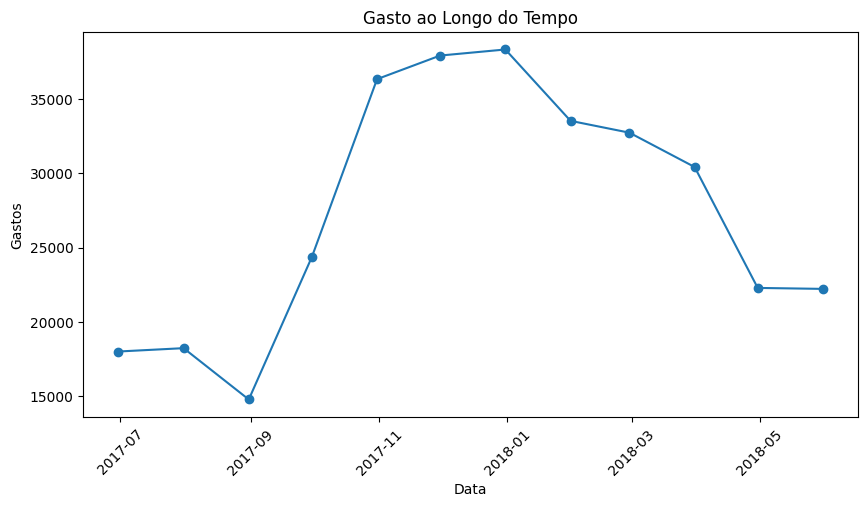

In [43]:
#Gráfico para facilitar a visualização
#Gasto por origem
plt.figure(figsize=(10, 5))
plt.bar(gasto_origem['source_id'], gasto_origem['costs'])
plt.xlabel('Source ID')
plt.ylabel('Gastos')
plt.title('Gasto por Origem')
plt.show()

# Gasto ao longo do tempo
plt.figure(figsize=(10, 5))
plt.plot(gasto_per_time['dt'], gasto_per_time['costs'], marker='o')
plt.xlabel('Data')
plt.ylabel('Gastos')
plt.title('Gasto ao Longo do Tempo')
plt.xticks(rotation=45)
plt.show()

Conclusão: 
- Dinheiro total gasto: $ 329,131.62. Este valor representa o investimento total em marketing durante o período analisado. É importante monitorar este valor para garantir que os gastos estão alinhados com o orçamento e os objetivos da empresa.


In [44]:
# Somar os custos de marketing para cada origem
costs_per_source = c_logs.groupby('source_id')['costs'].sum().reset_index()

# Contar o número de clientes adquiridos de cada origem
customers_per_source = v_logs.groupby('source_id')['uid'].nunique().reset_index()
customers_per_source.columns = ['source_id', 'num_customers']

# Calcular o CAC
cac_per_source = pd.merge(costs_per_source, customers_per_source, on='source_id')
cac_per_source['cac'] = cac_per_source['costs'] / cac_per_source['num_customers']

print(cac_per_source)

   source_id      costs  num_customers       cac
0          1   20833.27          18999  1.096546
1          2   42806.04          26245  1.631017
2          3  141321.63          74756  1.890439
3          4   61073.60          83525  0.731201
4          5   51757.10          56974  0.908434
5          9    5517.49           9264  0.595584
6         10    5822.49           8067  0.721766


In [45]:
#Nova Versão CAC
#Tamanho da coorte
cohort_sizes = first_orders_df.groupby('first_purchase_month')['uid'].nunique().reset_index()
cohort_sizes.rename(columns={'uid': 'n_buyers'}, inplace=True)

#Custos mensais
c_logs['month'] = c_logs['dt'].dt.to_period('M')  # converter a data para período mensal
monthly_costs = c_logs.groupby('month')['costs'].sum().reset_index()

#Merge
df_cac = pd.merge(monthly_costs, cohort_sizes, left_on='month', right_on='first_purchase_month')

#Calcular o CAC
df_cac['cac'] = df_cac['costs'] / df_cac['n_buyers']

print(df_cac[['month', 'costs', 'n_buyers', 'cac']])

      month     costs  n_buyers        cac
0   2017-06  18015.00      2023   8.905091
1   2017-07  18240.59      1923   9.485486
2   2017-08  14790.54      1370  10.796015
3   2017-09  24368.91      2581   9.441654
4   2017-10  36322.88      4340   8.369327
5   2017-11  37907.88      4081   9.288870
6   2017-12  38315.35      4383   8.741809
7   2018-01  33518.52      3373   9.937302
8   2018-02  32723.03      3651   8.962758
9   2018-03  30415.27      3533   8.608907
10  2018-04  22289.38      2276   9.793225
11  2018-05  22224.27      2988   7.437841


Conclusão:
- O Custo de Aquisição de Clientes (CAC) variou entre 7,44 e 10,80 no período analisado, refletindo mudanças sazonais, campanhas de marketing e outras variáveis. Os meses de agosto de 2017 e abril de 2018 apresentaram CAC mais altos, sugerindo custos de marketing mais elevados ou menor eficiência das campanhas. Em maio de 2018, o CAC foi mais baixo, indicando estratégias de marketing mais eficientes ou campanhas de aquisição de menor custo. A empresa deve ajustar suas estratégias de marketing para melhorar a eficiência de aquisição de clientes e otimizar o retorno sobre o investimento, monitorando continuamente essas métricas.

In [46]:
#Primeiro, unimos v_logs e o_logs para relacionar as compras com a origem
merged_logs = pd.merge(v_logs, o_logs, on='uid', suffixes=('_visit', '_order'))

#Depois, agrupamos por source_id e somamos as receitas
revenue_per_source = merged_logs.groupby('source_id')['revenue'].sum().reset_index()

#Obter os custos totais de marketing para cada origem
costs_per_source = c_logs.groupby('source_id')['costs'].sum().reset_index()

#ROI
roi_per_source = pd.merge(revenue_per_source, costs_per_source, on='source_id')
roi_per_source['roi'] = (roi_per_source['revenue'] - roi_per_source['costs']) / roi_per_source['costs']

print(roi_per_source)

   source_id       revenue      costs         roi
0          1  2.298200e+06   20833.27  109.313944
1          2  2.638189e+06   42806.04   60.631237
2          3  2.966880e+05  141321.63    1.099381
3          4  4.966902e+05   61073.60    7.132649
4          5  1.181477e+06   51757.10   21.827344
5          9  3.634225e+04    5517.49    5.586736
6         10  1.461923e+04    5822.49    1.510821


Conclusão:
- Para maximizar o retorno sobre investimentos em marketing, recomenda-se focar nos canais com maior ROI, especialmente Origem 1 e Origem 2, que demonstram alta eficiência. Investimentos adicionais em Origem 5 também são aconselháveis, com monitoramento maior. Origens com baixo ROI devem ser reavaliadas ou despriorizadas para garantir a eficiência dos recursos de marketing.

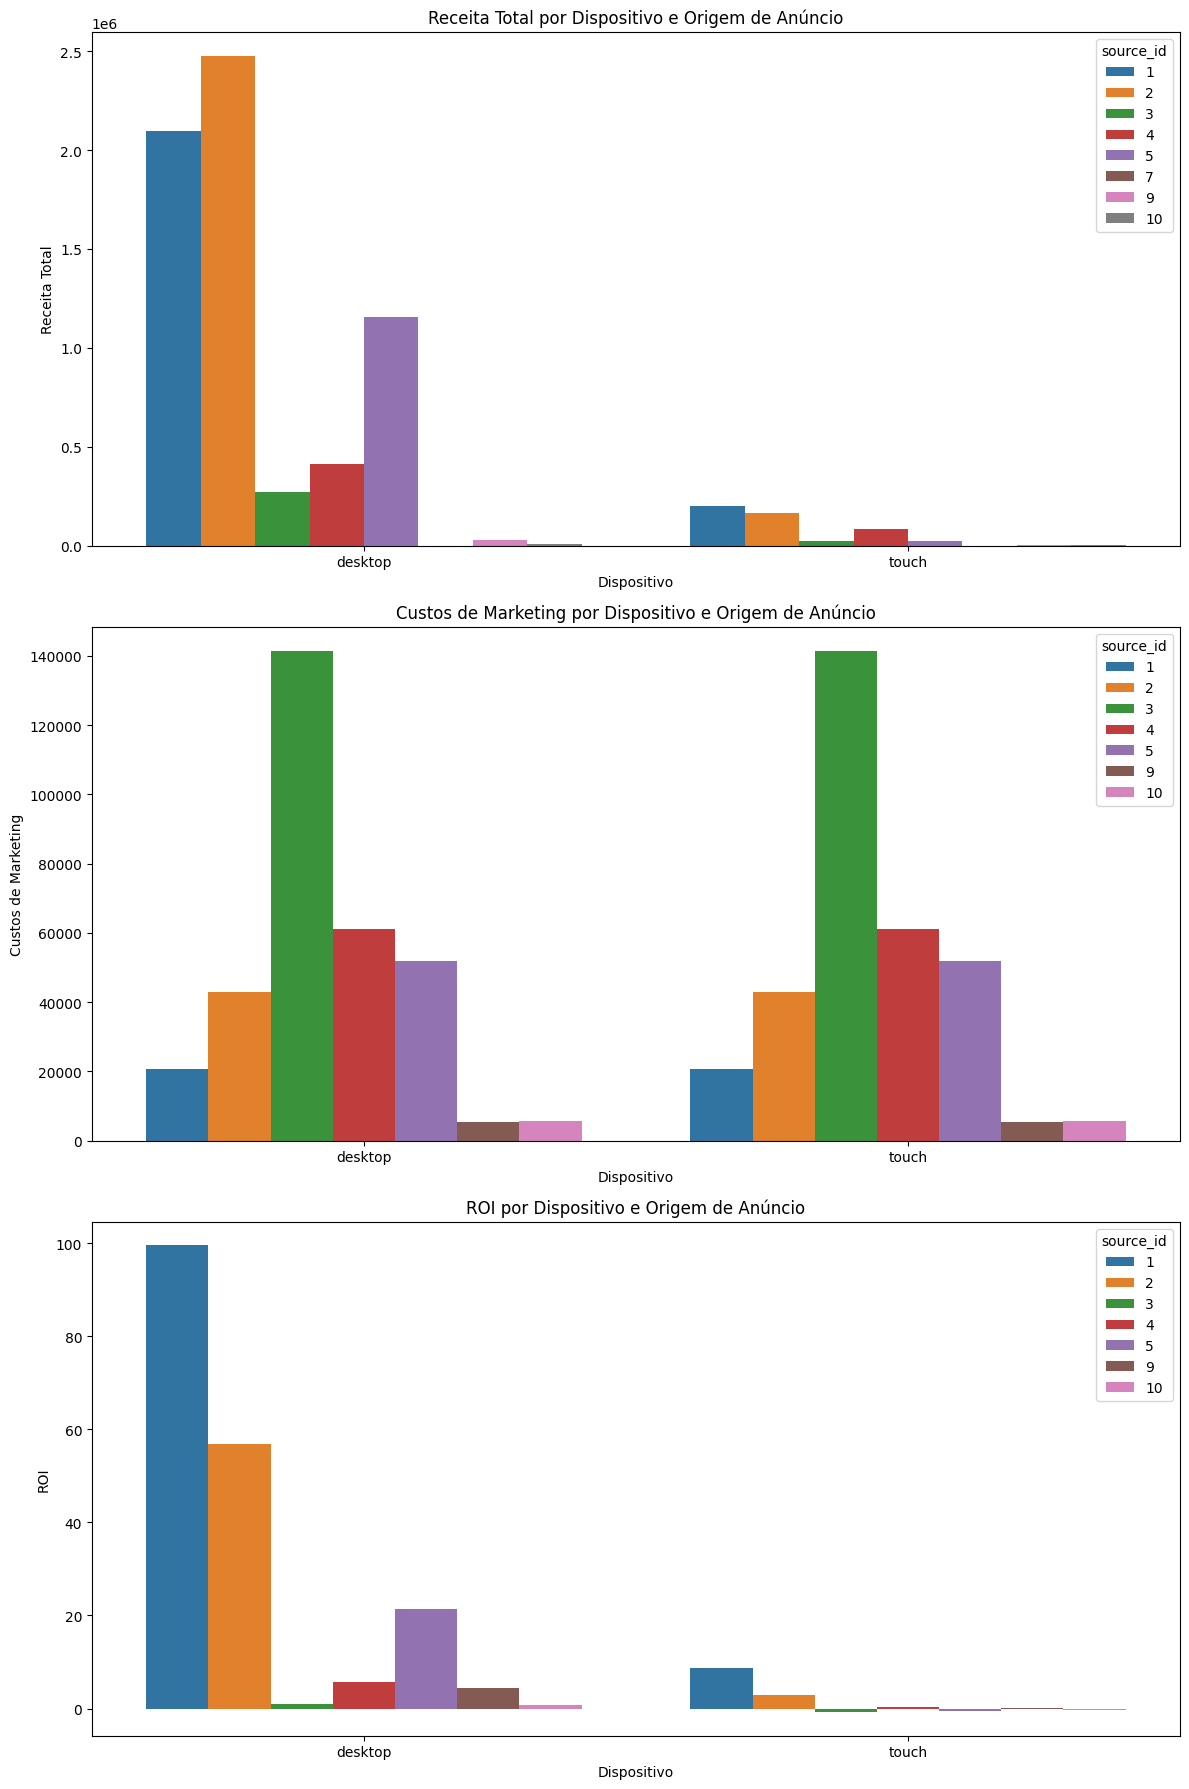

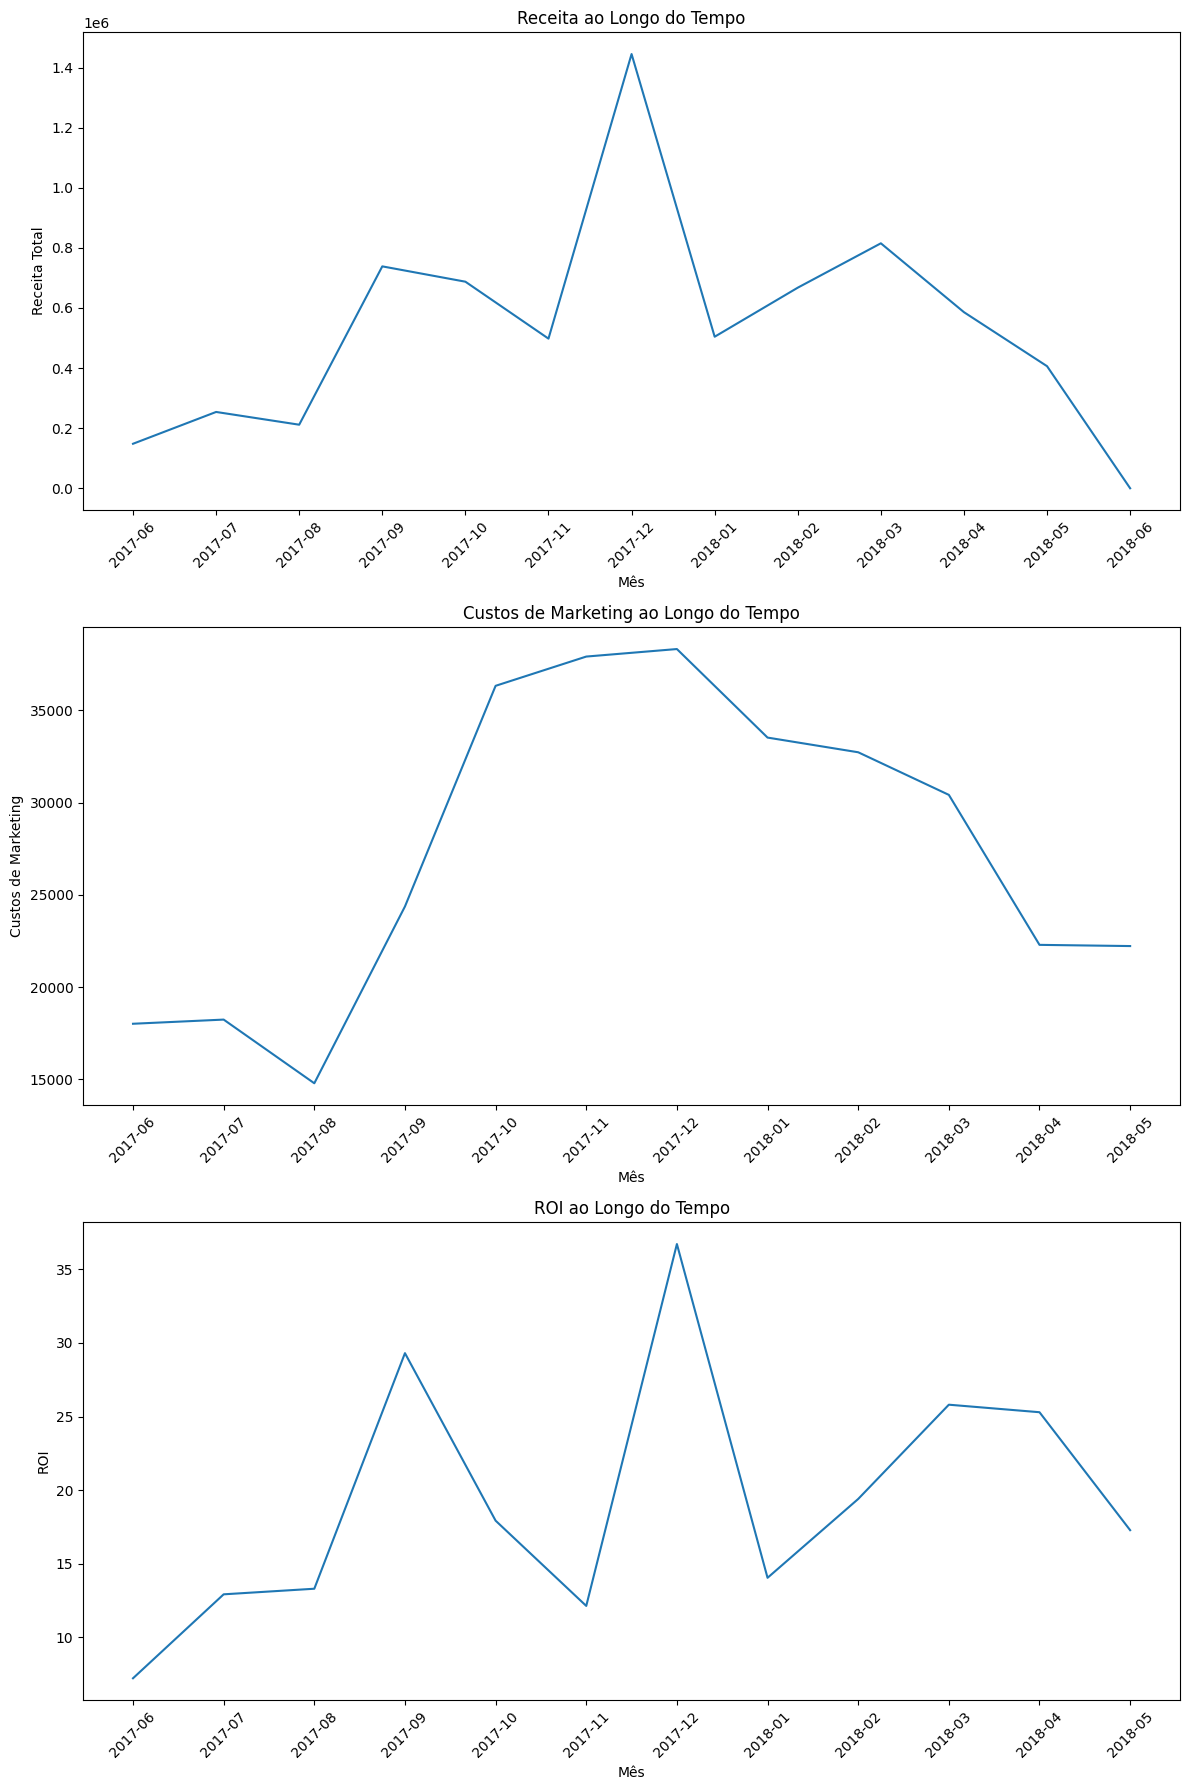

In [47]:
#Gráficos de acordo com dispositivos moveis

#Receita total por dispositivo
revenue_device_source = merged_logs.groupby(['device', 'source_id'])['revenue'].sum().reset_index()

#ROI por dispositivo e origem de anúncio
roi_device_source = pd.merge(revenue_device_source, costs_per_source, on='source_id')
roi_device_source['ROI'] = (roi_device_source['revenue'] - roi_device_source['costs']) / roi_device_source['costs']

# Receita, custos e ROI ao longo do tempo
merged_logs['month'] = merged_logs['buy_ts'].dt.to_period('M').astype(str)
revenue_time = merged_logs.groupby('month')['revenue'].sum().reset_index()
costs_time = c_logs.groupby(c_logs['dt'].dt.to_period('M').astype(str))['costs'].sum().reset_index()
revenue_costs_time = pd.merge(revenue_time, costs_time, left_on='month', right_on='dt', suffixes=('_revenue', '_costs'))
revenue_costs_time['ROI'] = (revenue_costs_time['revenue'] - revenue_costs_time['costs']) / revenue_costs_time['costs']

#Gráficos de barras para receita, custos e ROI por dispositivo e origem de anúncio
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
sns.barplot(x='device', y='revenue', hue='source_id', data=revenue_device_source, ax=axes[0])
axes[0].set_title('Receita Total por Dispositivo e Origem de Anúncio')
axes[0].set_ylabel('Receita Total')
axes[0].set_xlabel('Dispositivo')

sns.barplot(x='device', y='costs', hue='source_id', data=roi_device_source, ax=axes[1])
axes[1].set_title('Custos de Marketing por Dispositivo e Origem de Anúncio')
axes[1].set_ylabel('Custos de Marketing')
axes[1].set_xlabel('Dispositivo')

sns.barplot(x='device', y='ROI', hue='source_id', data=roi_device_source, ax=axes[2])
axes[2].set_title('ROI por Dispositivo e Origem de Anúncio')
axes[2].set_ylabel('ROI')
axes[2].set_xlabel('Dispositivo')

plt.tight_layout()
plt.show()

#Gráficos de linhas para receita, custos e ROI ao longo do tempo
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
sns.lineplot(x='month', y='revenue', data=revenue_time, ax=axes[0])
axes[0].set_title('Receita ao Longo do Tempo')
axes[0].set_ylabel('Receita Total')
axes[0].set_xlabel('Mês')
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(x='dt', y='costs', data=costs_time, ax=axes[1])
axes[1].set_title('Custos de Marketing ao Longo do Tempo')
axes[1].set_ylabel('Custos de Marketing')
axes[1].set_xlabel('Mês')
axes[1].tick_params(axis='x', rotation=45)

sns.lineplot(x='month', y='ROI', data=revenue_costs_time, ax=axes[2])
axes[2].set_title('ROI ao Longo do Tempo')
axes[2].set_ylabel('ROI')
axes[2].set_xlabel('Mês')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [48]:
o_logs['order_month'] = o_logs['buy_ts'].dt.to_period('M')
order_month = o_logs.groupby('uid')['order_month'].min().reset_index().rename(columns={'order_month': 'first_order_month'})
cohorts = pd.merge(o_logs, order_month, on='uid')
cohorts['cohort_lifetime'] = (cohorts['order_month'] - cohorts['first_order_month']).apply(lambda x: x.n)

#Agrupando
cohorts = cohorts.groupby(['first_order_month', 'order_month']).agg(revenue=('revenue', 'sum'), n_buyers=('uid', 'nunique')).reset_index()

#Ccohort_lifetime
cohorts['cohort_lifetime'] = (cohorts['order_month'] - cohorts['first_order_month']).apply(lambda x: x.n)

#Mesclagem
c_logs['costs_month'] = pd.to_datetime(c_logs['dt']).dt.to_period('M')
cost_per_month = c_logs.groupby('costs_month').agg(costs=('costs', 'sum')).reset_index()

#Merge
cohorts = pd.merge(cohorts, cost_per_month, left_on='order_month', right_on='costs_month', how='left')

#Calcular CAC, LTV e ROMI
cohorts['cac'] = cohorts['costs'] / cohorts['n_buyers']
cohorts['ltv'] = cohorts['revenue'] / cohorts['n_buyers']
cohorts['romi'] = cohorts['ltv'] / cohorts['cac']

#Tabela dinâmica
romi_pivot = cohorts.pivot_table(index='first_order_month', columns='cohort_lifetime', values='romi', aggfunc='mean').round(2)

#Calcular a soma acumulada do ROMI
cum_sum_romi = romi_pivot.cumsum(axis=1).round(2)

print(cum_sum_romi)

cohort_lifetime      0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06            0.53  0.58  0.64  0.72  0.78  0.82  0.87  0.91  0.94  0.98   
2017-07            0.63  0.67  0.72  0.74  0.75  0.76  0.77  0.78  0.79  0.80   
2017-08            0.49  0.52  0.54  0.55  0.57  0.58  0.59  0.61  0.63  0.64   
2017-09            0.60  0.68  0.72  0.99  1.02  1.07  1.13  1.16  1.18   NaN   
2017-10            0.60  0.66  0.68  0.70  0.72  0.74  0.76  0.78   NaN   NaN   
2017-11            0.55  0.59  0.61  0.65  0.67  0.68  0.70   NaN   NaN   NaN   
2017-12            0.54  0.57  0.69  0.84  0.90  0.97   NaN   NaN   NaN   NaN   
2018-01            0.42  0.45  0.48  0.50  0.51   NaN   NaN   NaN   NaN   NaN   
2018-02            0.46  0.49  0.50  0.51   NaN   NaN   NaN   NaN   NaN   NaN   
2018-03            0.56  0.61  0.66   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-04            0.48  0.5

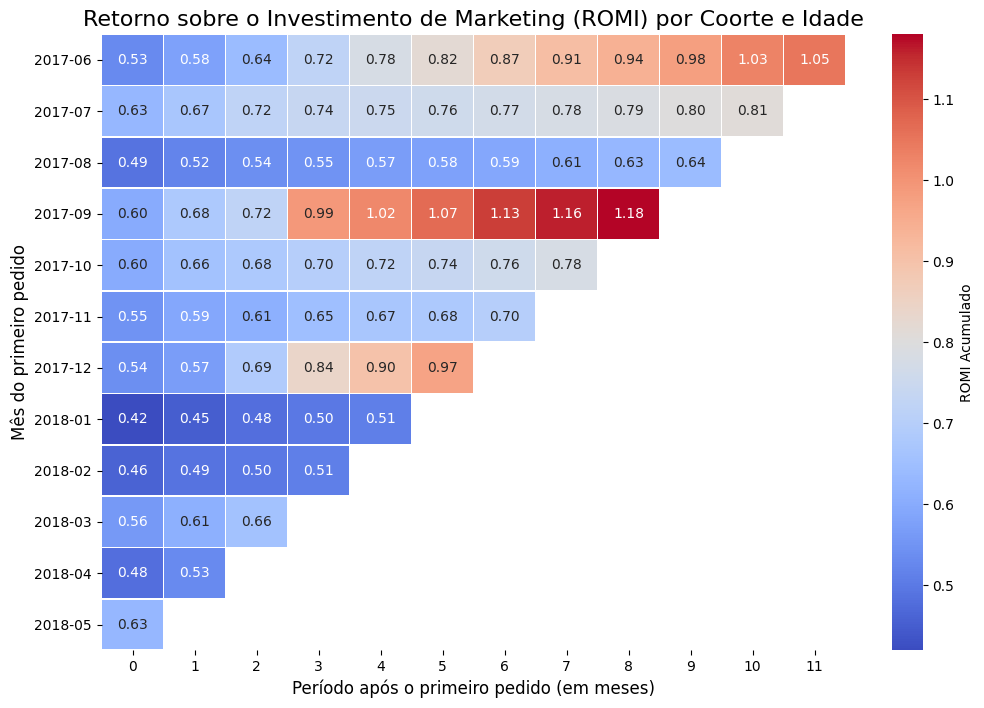

In [49]:
#Headmap
plt.figure(figsize=(12, 8))
sns.heatmap(cum_sum_romi, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5, cbar_kws={'label': 'ROMI Acumulado'})
plt.title('Retorno sobre o Investimento de Marketing (ROMI) por Coorte e Idade', fontsize=16)
plt.xlabel('Período após o primeiro pedido (em meses)', fontsize=12)
plt.ylabel('Mês do primeiro pedido', fontsize=12)
plt.show()

- A análise da tabela dinâmica de ROMI por coorte revela que as estratégias de marketing de 2017 foram mais eficazes em gerar retorno ao longo do tempo, com crescimento contínuo e rápido. Em contraste, as coortes de 2018 mostraram desempenho mais fraco, com crescimento mais lento e menores retornos, sugerindo que as mudanças nas estratégias ou condições de mercado em 2018 não foram tão bem-sucedidas. No geral, as coortes de 2017 foram mais eficientes em converter o investimento em marketing em receita, enquanto as coortes de 2018 enfrentaram desafios para sustentar esse crescimento.

### Passo 3. Escreva uma conclusão: recomende aos especialistas de marketing quanto dinheiro e onde seria melhor investir.

De acordo com alguns dados fornecidos, é possível realizar algumas análises e recomendar aos especialistas de marketing onde seria o lugar ideal para investir, com recomendações fundamentadas em algumas métricas.

ROI (Retorno sobre Investimento): O ROI é uma métrica crucial que indica a eficácia dos investimentos de marketing. De acordo com a análise dos gráficos, algumas origens de anúncio possuem um ROI maior do que outras, como:

- Cohorts de Dezembro de 2017 e Março de 2018 tiveram os LTVs mais altos (11.09 e 8.88). Recomenda-se aumentar investimentos em campanhas similares, replicando estratégias que atraíram clientes de alto valor.

- Cohorts de Julho a Outubro de 2017 mostraram LTVs de 7.32 a 9.10. A recomendação é manter o investimento, focando mais em estratégias de retenção para aumentar o LTV ao longo do tempo.

- Cohorts de Junho de 2017 e Janeiro de 2018 apresentaram os LTVs mais baixos (5.35 e 6.04). Recomenda-se reduzir investimentos em campanhas semelhantes e explorar novas estratégias para atrair clientes de maior valor.

Oportunidades de Melhoria para Fontes com ROI Moderado:
-

Receita por Dispositivo: A receita de acordo com diferentes dispositivos nos ajuda a identificar e entender quais são mais lucrativos. Dispositivos Desktop, em conjunto com Origem 1 e 2, geraram receitas elevadas, sugerindo que campanhas de marketing direcionadas para esses usuários de desktop podem ser a melhor estratégia.

RECOMENDAÇÕES:

AUMENTAR INVESTIMENTOS:
- Origem 1: ROI positivo e boa receita, mas CAC e retenção moderados. Recomendamos continuar investindo, porém com análise recorrente.

INVESTIR MODERADAMENTE:
- Origem 2: ROI positivo e boa receita, mas CAC moderado. Recomendamos continuar investindo, porém com análise recorrente.

REDUZIR INVESTIMENTOS:
- Origem 3: Alto CAC e ROI baixo. Recomendamos reduzir os investimentos ou reavaliar as estratégias de marketing.

Lembrando que os dados mostram que o melhor a se fazer é focar e desenvolver campanhas para usuários que utilizam dispositivos de desktop.